### MSE - T-MachLe
# PW 07

{dorian.magnin, noemien.kocher}@master.hes-so.ch

# Exercice 1 Getting the data

## a) Load the two given datasets :

In [1]:
import pandas as pd

# Load the dataset
X1, label1 = pd.read_pickle("data/dataset_1.pkl")
X2, label2 = pd.read_pickle("data/dataset_2.pkl")

## b) Visualize the data using various color for each unique labels like in figure 1

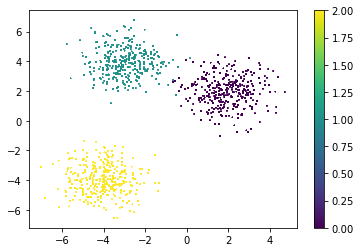

In [2]:
import numpy as np
import matplotlib.pyplot as plt

plt.scatter([X1[i][0] for i in range(len(X1))],
            [X1[i][1] for i in range(len(X1))],
            c=label1,
            s=3,
            marker='+')
plt.colorbar()
plt.show()

# Exercice 2 The k-means algorithm


Using numpy, implements the k-means algorithm as follow :

a) Initialise the centroids μ1, μ2, ..., μK.

In [3]:
import random

centroids = []
K = 3


def init_centroids():
    centroids = []
    
    xmin = np.min( [X1[i][0] for i in range(len(X1))] )
    ymin = np.min( [X1[i][1] for i in range(len(X1))] )
    xmax = np.max( [X1[i][0] for i in range(len(X1))] )
    ymax = np.max( [X1[i][1] for i in range(len(X1))] )
    
    for ki in range(K):
        centroids.append( [random.uniform(xmin, xmax), 
                       random.uniform(ymin, ymax)] )
        #centroids.append([0,0])
    return centroids
   
centroids = init_centroids() 
print(centroids)

[[-0.52855373535293193, -2.66573431958372], [0.1313200717988563, -3.1856478109581232], [1.0442181540880302, -0.65638201914765659]]


b) Until convergence :

i) Find the closest centroid for each point ii) Reevaluate the centroids

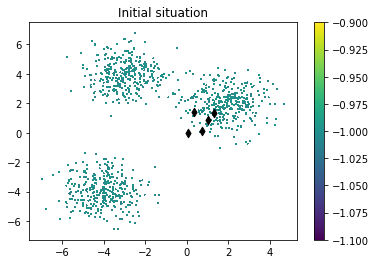

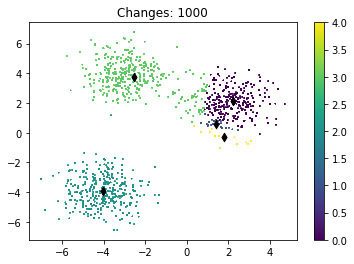

1000


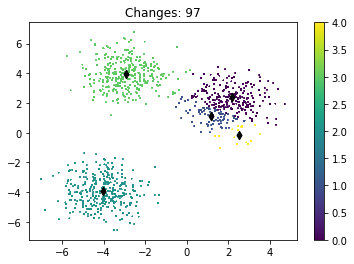

97


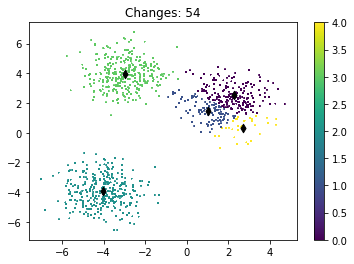

54


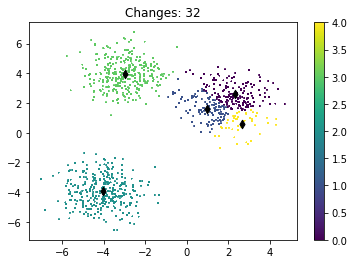

32


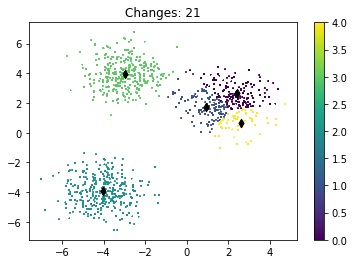

21


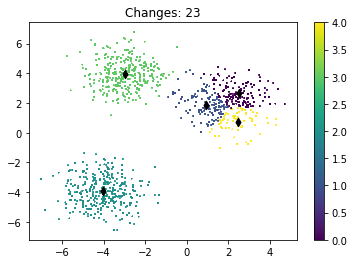

23


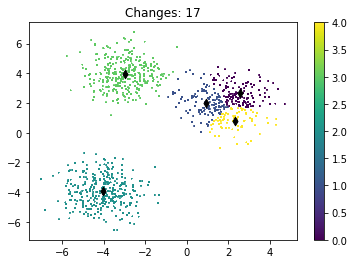

17


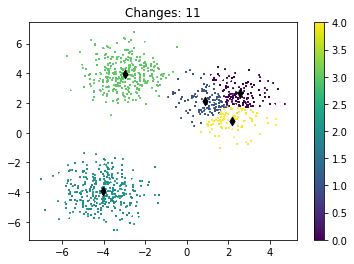

11


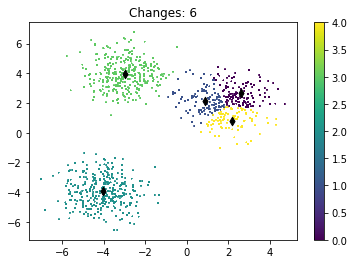

6


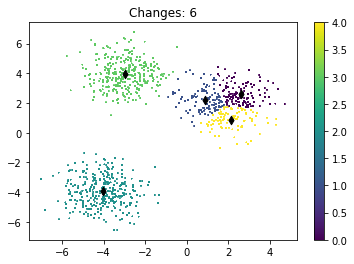

6


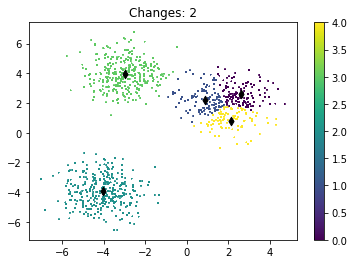

2


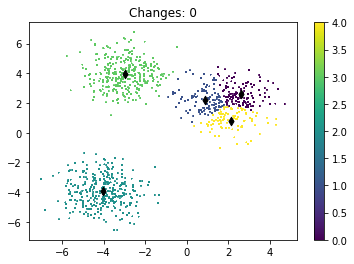

0


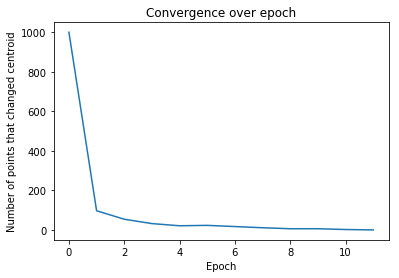

In [43]:
def compDist(pointa, pointb):
    return (pointa[0] - pointb[0])**2 + (pointa[1] - pointb[1])**2


pointsCentroidI = [ -1 for _ in range(len(X1)) ]


def our_kmean_step():
    points_centroid_changed = 0

    for i in range(len(X1)):
        best_centroidI = 0
        best_dist = compDist(X1[i], centroids[0])
        
        for k in range(1, len(centroids)):
            dist = compDist(X1[i], centroids[k])
            if dist < best_dist:
                best_dist = dist
                best_centroidI = k
        old_centroidI = pointsCentroidI[i]
        pointsCentroidI[i] = best_centroidI
        if old_centroidI != best_centroidI:
            points_centroid_changed = points_centroid_changed + 1
   
          
    for k in range(len(centroids)):
        xtot = 0
        ytot = 0
        num_count = 0
        for i in range(len(pointsCentroidI)):
            if pointsCentroidI[i] == k:
                num_count = num_count + 1
                xtot = xtot + X1[i][0]
                ytot = ytot + X1[i][1]
        if num_count != 0:
            new_x = xtot / num_count
            new_y = ytot / num_count
            centroids[k][0] = new_x
            centroids[k][1] = new_y
        
    return points_centroid_changed
       
centroids = init_centroids()  


def showScatter(title):        
    plt.scatter([X1[i][0] for i in range(len(X1))],
                [X1[i][1] for i in range(len(X1))],
                c=pointsCentroidI,
                s=3,
                marker='+')
    plt.colorbar()
    plt.scatter([centroids[i][0] for i in range(len(centroids))],
                [centroids[i][1] for i in range(len(centroids))],
                c="black",
                marker="d")
    plt.title(title)
    plt.show()


fig = plt.figure()

sct = plt.scatter([X1[i][0] for i in range(len(X1))],
                    [X1[i][1] for i in range(len(X1))],
                    c=pointsCentroidI,
                    s=3,
                    marker='+')
        

changes_hist = []
showScatter("Initial situation")

while True:
    changes = our_kmean_step()
    changes_hist.append(changes)
    showScatter("Changes: "+ (str)(changes))
    print(changes)
    if changes == 0:
        break

plt.show()        

plt.plot(np.arange(0,len(changes_hist),1), changes_hist)
plt.title("Convergence over epoch")
plt.xlabel("Epoch")
plt.ylabel("Number of points that changed centroid")
plt.show()


We also ask you to define and implement strategies for the :

— Initialisation of the centroids.   
— Convergence criteria.

Pour l'initialisation, nous avons fait une fonciton aléatoire qui prend une valeur dans l'interval des données.

Pour la convergence, nous prenons le nombre de points ayant changé de centroid. Nous avons mis la convergence dans un graph.

# Exercice 3 Evaluate your model

At this point, your k-means algorithm is working :
— Visualize your convergence criteria over the epochs 1 using the dataset 1.

— Visualize the output of your k-means on the dataset 1.

-> Done using graph

— Do you experience sensitivity to the initial values of the centroids ? Is your strategy for initialization working well in most cases ?

-> La plupart du temps, les résultats convergent bien mais nous avons observé quelques cas où les clusters ne sont pas bons.

— Document your convergence criteria. Could you think about other convergence criteria ?

Notre critère de convergence est le nombre de points ayant changé de cluster. Nous avons aussi pensé à utilisé la plus grand distance parcourue par les clusters.

— Visualize your convergence criteria over time using the dataset 2.

— Visualize the output of your k-means on the dataset 2 and comment your results.

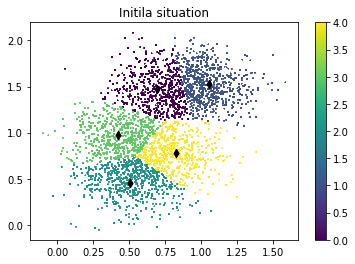

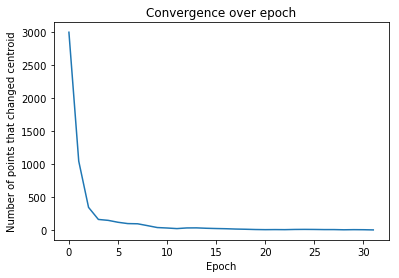

In [5]:
centroids = []
K = 5


def init_centroids():
    centroids = []
    
    xmin = np.min( [X2[i][0] for i in range(len(X2))] )
    ymin = np.min( [X2[i][1] for i in range(len(X2))] )
    xmax = np.max( [X2[i][0] for i in range(len(X2))] )
    ymax = np.max( [X2[i][1] for i in range(len(X2))] )
    
    for ki in range(K):
        centroids.append( [random.uniform(xmin, xmax), 
                       random.uniform(ymin, ymax)] )
        #centroids.append([0,0])
    return centroids
   
centroids = init_centroids() 

def compDist(pointa, pointb):
    return (pointa[0] - pointb[0])**2 + (pointa[1] - pointb[1])**2


pointsCentroidI = [ -1 for _ in range(len(X2)) ]


def our_kmean_step():
    points_centroid_changed = 0

    for i in range(len(X2)):
        best_centroidI = 0
        best_dist = compDist(X2[i], centroids[0])
        
        for k in range(1, len(centroids)):
            dist = compDist(X2[i], centroids[k])
            if dist < best_dist:
                best_dist = dist
                best_centroidI = k
        old_centroidI = pointsCentroidI[i]
        pointsCentroidI[i] = best_centroidI
        if old_centroidI != best_centroidI:
            points_centroid_changed = points_centroid_changed + 1
   
          
    for k in range(len(centroids)):
        xtot = 0
        ytot = 0
        num_count = 0
        for i in range(len(pointsCentroidI)):
            if pointsCentroidI[i] == k:
                num_count = num_count + 1
                xtot = xtot + X2[i][0]
                ytot = ytot + X2[i][1]
        if num_count != 0:
            new_x = xtot / num_count
            new_y = ytot / num_count
            centroids[k][0] = new_x
            centroids[k][1] = new_y
        
    return points_centroid_changed
       
centroids = init_centroids()  


def showScatter(title):        
    plt.scatter([X2[i][0] for i in range(len(X2))],
                [X2[i][1] for i in range(len(X2))],
                c=pointsCentroidI,
                s=3,
                marker='+')
    plt.colorbar()
    plt.scatter([centroids[i][0] for i in range(len(centroids))],
                [centroids[i][1] for i in range(len(centroids))],
                c="black",
                marker="d")
    plt.title(title)
    plt.show()

changes_hist = []
while True:
    changes = our_kmean_step()
    changes_hist.append(changes)
    if changes == 0:
        break
        

showScatter("Initila situation")

plt.plot(np.arange(0,len(changes_hist),1), changes_hist)
plt.title("Convergence over epoch")
plt.xlabel("Epoch")
plt.ylabel("Number of points that changed centroid")
plt.show()


Le deuxième dataset ne semble pas contenir de classes perseptibles. On remarque que la fonction converge très vite mais "stagne avant de tomber à 0. On utilise une répartition aléatoire pour les classes. Nous avons lancé la classification plusieurs fois et ça donne quasi toujours la même chose. Nous aonvs aussi essayé de faire varier le nombre de *k*.